In [1]:
import ROOT as rt
import time
from ipywidgets import interact, IntSlider, FloatSlider

Welcome to JupyROOT 6.18/04


In [2]:
canvas = rt.TCanvas("pid")
rt.gPad.SetLogz()

In [3]:
input_file = rt.TFile("../online/AnalysisResults.root")
object_list = input_file.Get("h-lambda")

pid_hist = object_list.FindObject("fPid")

In [4]:
def reset_sigma():
    pid_hist.GetAxis(3).SetRangeUser(0, 0)
    pid_hist.GetAxis(4).SetRangeUser(0, 0)
    pid_hist.GetAxis(5).SetRangeUser(0, 0)
    pid_hist.GetAxis(6).SetRangeUser(0, 0)

In [5]:
def set_sigma(TpcNSigmaPion, TofNSigmaPion, TpcNSigmaProton, TofNSigmaProton):
    
    pid_hist.GetAxis(3).SetRangeUser(-TpcNSigmaPion, TpcNSigmaPion)
    pid_hist.GetAxis(4).SetRangeUser(-TofNSigmaPion, TofNSigmaPion)
    pid_hist.GetAxis(5).SetRangeUser(-TpcNSigmaProton, TpcNSigmaProton)
    pid_hist.GetAxis(6).SetRangeUser(-TofNSigmaProton, TofNSigmaProton)
    pid_hist.SetName(f"{time.time()}")

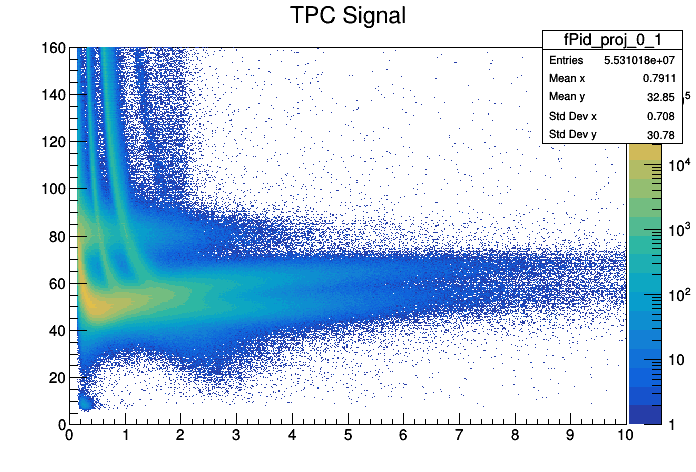

In [6]:
dedx = pid_hist.Projection(1, 0)
dedx.SetTitle("TPC Signal")
dedx.Draw("COLZ")
canvas.Draw()

In [7]:
interact(set_sigma, 
         TpcNSigmaPion=FloatSlider(min=0, max=10, step=0.25, value=0), 
         TofNSigmaPion=FloatSlider(min=0, max=10, step=0.25, value=0), 
         TpcNSigmaProton=FloatSlider(min=0, max=10, step=0.25
                                     , value=0),
         TofNSigmaProton=FloatSlider(min=0, max=10, step=0.25, value=0))

interactive(children=(FloatSlider(value=0.0, description='TpcNSigmaPion', max=10.0, step=0.25), FloatSlider(va…

<function __main__.set_sigma(TpcNSigmaPion, TofNSigmaPion, TpcNSigmaProton, TofNSigmaProton)>

Warning in <TFile::Append>: Replacing existing TH1: 1586284619.16928_proj_0_1 (Potential memory leak).


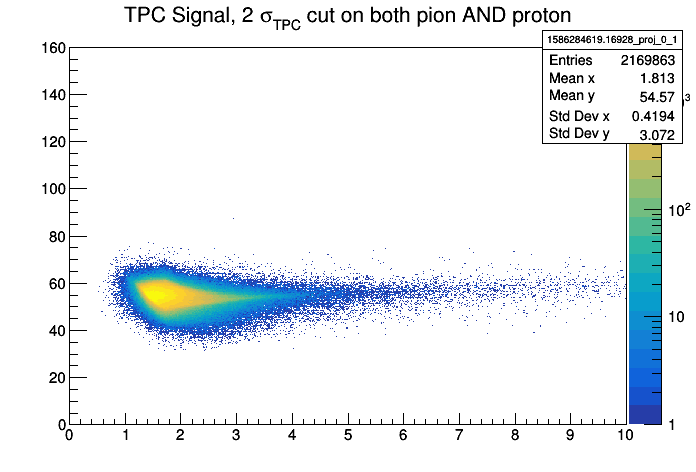

In [9]:
dedx = pid_hist.Projection(1, 0)
dedx.SetTitle("TPC Signal, 2 #sigma_{TPC} cut on both pion AND proton")
dedx.Draw("COLZ")
canvas.Draw()

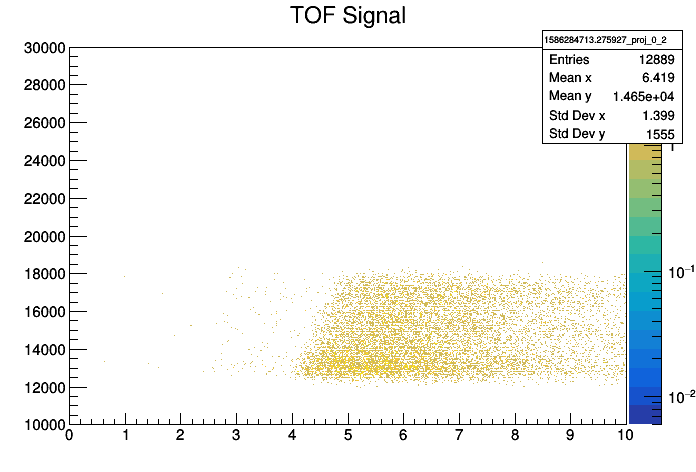

In [10]:
tof = pid_hist.Projection(2, 0)
tof.SetTitle("TOF Signal")
tof.Draw("COLZ")
canvas.Draw()

In [10]:
tpcnsigmaPion = pid_hist.Projection(3, 0)
tpcnsigmaPion.SetTitle("TPCnSigma (Pion) vs P")

tpcnsigmaPion.Draw("COLZ")
canvas.Draw()

In [11]:
tofnsigmaPion = pid_hist.Projection(4, 0)
tofnsigmaPion.SetTitle("TOFnSigma (Pion) vs P")

tofnsigmaPion.Draw("COLZ")
canvas.Draw()

In [12]:
tpcnsigmaProton = pid_hist.Projection(5, 0)
tpcnsigmaProton.SetTitle("TPCnSigma (Proton) vs P")

tpcnsigmaProton.Draw("COLZ")
canvas.Draw()

In [13]:
tofnsigmaProton = pid_hist.Projection(6, 0)
tofnsigmaProton.SetTitle("TOFnSigma (Proton) vs P")

tofnsigmaProton.Draw("COLZ")
canvas.Draw()

In [14]:
TOFvTPCnSigmaPion = pid_hist.Projection(4, 3)
TOFvTPCnSigmaPion.SetTitle("TOFnSigma v TPCnSigma (Pion)")

TOFvTPCnSigmaPion.Draw("COLZ")
canvas.Draw()

In [4]:
TOFvTPCnSigmaProton = pid_hist.Projection(6, 5)

TOFvTPCnSigmaProton.SetTitle("TOFnSigma v TPCnSigma (Proton)")

TOFvTPCnSigmaProton.Draw("COLZ")
canvas.Draw()